In [1]:
from IPython.display import HTML
HTML('''
<script>
code_show=false;
function code_toggle(){
    if(code_show){$('.prompt, .input, .output_stderr, .output_error').hide();}
    else{$('.input, .prompt, .output_stderr, .output_error').show();}
    code_show=!code_show;
}
function initialize(){
    document.body.style.fontFamily='Palatino';
    var output=$('.output_subarea.output_text.output_stream.output_stdout');
    $.merge(output,$('.output_subarea.output_text.output_result'));
    for(var i=0;i<output.length;i++)for(var j=0;j<output[i].children.length;j++)
        output[i].children[j].style.fontFamily='Palatino';
    code_toggle();
}
$(document).ready(initialize);
</script>
Click <a href="javascript:code_toggle()">here</a> to show/hide codes in this notebook.
''')

## 7.1.2 Exercices
### Exercice 1.
Soit la fonction de boucle ouverte d'un processus d'asservissement de position: $$G(p)={\frac {1}{(1+0,5p)(1+0,25p)}}$$

On demande de déterminer *graphiquement* le correcteur proportionnel qui soit capable de minimiser l'erreur de position tout en assurant une marge de phase de 45°. Que vaudra cette erreur de position minimale?
Comparez avec l'exercice 1 de la page 5-19 dont l'équation est: $$G(p)={\frac {1}{p(1+0,5p)(1+0,25p)}}$$

#### Solution:

In [2]:
from control.matlab import *  # Python Control Systems Toolbox (compatibility with MATLAB)
import numpy as np              # Library to manipulate array and matrix
import matplotlib.pyplot as plt # Library to create figures and plots
import math # Library to be able to do some mathematical operations
import ReguLabFct as rlf # Library useful for the laboratory of regulation of Gramme

##### 1.

Tracer la courbe du système en BO dans le dagramme de Black-Nichols.

In [3]:
# Fonction de transfert en boucle ouverte
G1 = tf(1, [0.5, 1])
G2 = tf(1, [0.25, 1])
G = G1*G2
print("G(p) = ", G)    # G de l'énoncé

G(p) =  
          1
----------------------
0.125 s^2 + 0.75 s + 1



<div class="alert alert-block alert-danger">
<b>Remarque:</b> le 'p' de la formule est noté 's' dans la notation anglophone et donc dans les résultats calculés!
</div>

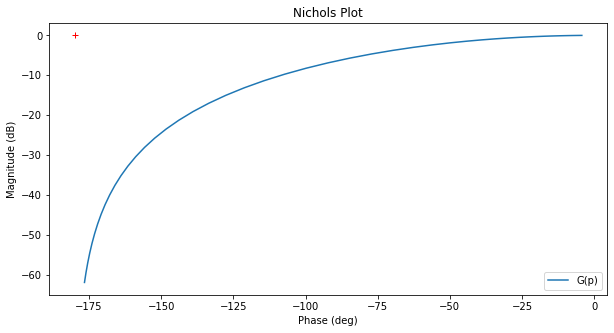

In [4]:
fig = plt.figure("Nichols",figsize=(10,5))
rlf.nichols(G, labels=['G(p)'], NameOfFigure = "Nichols")

Sachant que l'effet du correcteur est de translater la courbe et comme on désire une marge de phase de 45°, il faut mesurer le gain en -135°. On trouve:

Gain à -135° = -17.56544890480597 dB
Fréquence à -135° = 7.1233661553256065 rad/sec


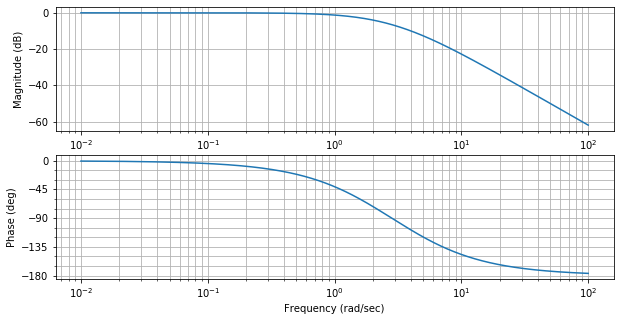

In [5]:
MP = 45
fig = plt.figure("Bode",figsize=(10,5))
ax = fig.subplots()
mag, w = rlf.getValues(G, -180+MP, printValue=True, NameOfFigure="Bode")

Dès lors, pour assurer une marge de phase de 45°, on peut translater la courbe de phase de 17.5dB, soit

In [6]:
Kp = 1/mag  # Donne directement la valeur de l'amplitude => Pas besoin de la convertir à partir d'une valeur en dB + Kp va à l'inverse de ce qu'on mesure
print("Kp =", Kp)

Kp = 7.5556606703682965


Marge de phase du système corrigé = 44.99855997300941 °.


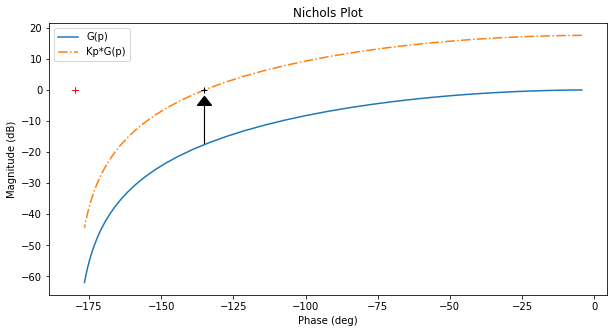

In [7]:
fig = plt.figure("Nichols", figsize=(10,5))
ax = fig.subplots()
rlf.nichols(G, labels=['G(p)'], NameOfFigure = "Nichols")
rlf.nichols(Kp*G, labels=['Kp*G(p)'], NameOfFigure = "Nichols", linestyle='-.')
ax.plot(-180+MP, 0,'k+'); # ; pour supprimer les lignes de sortie matplotlib
ax.arrow(-180+MP, 20*np.log10(mag), 0, -20*np.log10(mag)-2, 
         length_includes_head=True, width=.05, head_width=5, head_length=3, color='k');

gm, pm, wg, wp = margin(Kp*G) # Extract the gain margin (Gm) and the phase margin (Pm)
print("Marge de phase du système corrigé =", pm, "°.")

En analysant les réponses indicielles du système corrigé et non corrigé, on obtient:


Système non corrigé
-------------------
DC gain = 0.500 => Erreur de position = 50.0%
Rise Time = 0.571 s
Peak amplitude = 0.514
Overshoot = 2.92%
Settling Time = 0.780 s


Système corrigé
---------------
DC gain = 0.883 => Erreur de position = 11.7%
Rise Time = 0.170 s
Peak amplitude = 1.143
Overshoot = 29.5%
Settling Time = 0.946 s



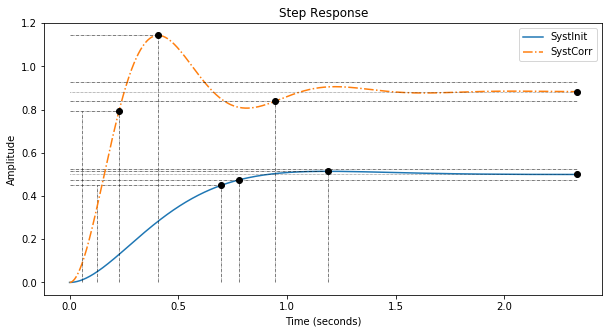

In [8]:
fig = plt.figure("Step Response",figsize=(10,5))
ax = fig.subplots()

# Système non corrigé
# -------------------

Gbf = feedback(G,1)
info = rlf.info()
rlf.stepWithInfo(Gbf, info, NameOfFigure="Step Response", sysName='SystInit') # Renvoie toutes les infos du step

ep = (1-info.DCGain)*100 # Erreur de position

print("\nSystème non corrigé")
print("-------------------")
print(f"""DC gain = {info.DCGain:.3f} => Erreur de position = {ep:.1f}%
Rise Time = {info.RiseTime:.3f} s
Peak amplitude = {info.Peak:.3f}
Overshoot = {info.Overshoot:.3}%
Settling Time = {info.SettlingTime:.3f} s
""")

# Système corrigé
# ---------------
Gbf_P = feedback(Kp*G,1)
info_P = rlf.info()
rlf.stepWithInfo(Gbf_P, info_P, NameOfFigure="Step Response", sysName='SystCorr', linestyle='-.') # Renvoie toutes les infos du step

ep_P = (1-info_P.DCGain)*100 # Erreur de position

print("\nSystème corrigé")
print("---------------")
print(f"""DC gain = {info_P.DCGain:.3f} => Erreur de position = {ep_P:.1f}%
Rise Time = {info_P.RiseTime:.3f} s
Peak amplitude = {info_P.Peak:.3f}
Overshoot = {info_P.Overshoot:.3}%
Settling Time = {info_P.SettlingTime:.3f} s
""")

Soit une erreur de position de 12% au lieu de 50% pour le système non corrigé et un temps de montée diminué de 571 ms à 170 ms mais au détriment d'un dépassement de 29.5 %.

##### 2.

Le système

$$G(p)={\frac {1}{p(1+0,5p)(1+0,25p)}}$$ 

possède un pôle à l'origine (classe 1) et présente donc une erreur de position nulle.

DC gain = 1.0
=> Erreur de position = 0.0


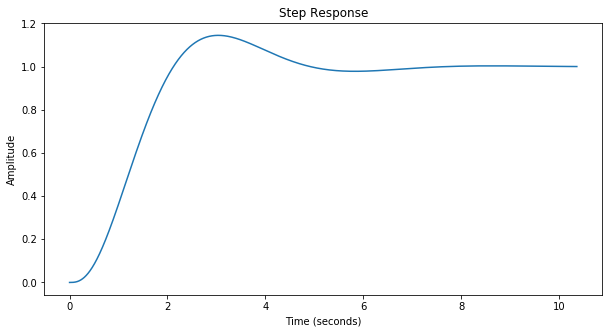

In [9]:
fig = plt.figure("Step Response",figsize=(10,5))
ax = fig.subplots()

G2 = G * tf(1,[1, 0])
Gbf2 = feedback(G2,1)
rlf.step_(Gbf2, NameOfFigure="Step Response");
print("DC gain =", dcgain(Gbf2))
print("=> Erreur de position =", 1-dcgain(Gbf2))

In [10]:
HTML('''<script>initialize();</script>Click <a href="javascript:code_toggle()">here</a> to show/hide codes in this notebook.''')